In [1]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns

In [2]:
#Install
!pip install umap-learn magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=6329208be77be0082800281e22bc13d55fbfeccf969efb8047562a84c515ce28
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=e69d86d64d261dccd20a5af8c6ce5be8da3682b20d2988b9a326da7999fe2e99
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857b

In [3]:
import umap

In [4]:
url_proka = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/proka_matrix_v1.txt'

In [5]:
urllib.request.urlretrieve(url_proka, 'proka_matrix_v1.txt')
os.listdir()
#!cd /content

['.config', 'proka_matrix_v1.txt', 'sample_data']

In [6]:

url_proka_tag = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/mod_tabla_sample.txt'


In [7]:
urllib.request.urlretrieve(url_proka_tag, 'mod_tabla_sample.txt')
os.listdir()
!cd /content

In [8]:
complement_asvstable = pd.read_csv('/content/proka_matrix_v1.txt', delimiter = "\t",header=0).set_index('taxa').T

In [9]:
complement_asvstable

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,0,73,0,0,0,0,114,0,0
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,77,0,0
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,0,363,0,0
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,0,355,0,0,0,0,0,0,0
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,0,367,0,0,0,0,715,0,0
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,0,1854,0,0,0,0,11,0,0
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,0,83,0,0,0,0,0,0,0


In [10]:
sample_data = pd.read_csv('/content/mod_tabla_sample.txt', delimiter = "\t")
sample_data = sample_data.set_index('sample_id')
sample_data = sample_data['status']
sample_data = pd.DataFrame(sample_data)
sample_data_1 =  pd.DataFrame(sample_data)
sample_data

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [11]:
sample_data= pd.Series(data=sample_data['status'])

In [12]:
clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
sample_data_4umap= sample_data.map(clasesdic)

In [13]:
sample_data_4umap

sample_id
sample_30099    0
sample_30104    0
sample_30114    1
sample_30170    3
sample_30189    4
               ..
sample_75015    2
sample_75024    3
sample_75029    0
sample_75041    1
sample_75049    0
Name: status, Length: 430, dtype: int64

#**Microbiome data and mbPHENIX**

In [14]:
#GENERAL CODE OF mbPHENIX
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import umap
import time

def mbPHENIX(data, umap_data, t=10, decay=15, metric='euclidean', knn=10, return_type='both'):
    """
    This function applies a diffusion-based imputation method to microbiome data,
    utilizing UMAP (Uniform Manifold Approximation and Projection) as a low-dimensional representation
    instead of more traditional methods like PCA (Principal Component Analysis).

    Parameters
    ----------
    data: ndarray
        Original high-dimensional data representing microbial features across samples.
    umap_data: ndarray
        Low-dimensional data representation of microbiome samples using UMAP.
    t: int, default=10
        Parameter for the power to which the diffusion operator matrix is raised.
    decay: int, default=15
        Decay rate for the exponential function used to calculate the affinity matrix.
    metric: str, default='euclidean'
        Distance metric used to calculate the pairwise distance matrix.
    knn: int, default=10
        Number of nearest neighbours to consider when calculating the epsilon value.
    return_type: str, default='both'
        Controls what data is returned by the function.
        If 'both', both the imputed data and the Markov transition matrix are returned.
        If 'imputed', only the imputed data is returned.
        If 'markov', only the Markov transition matrix is returned.

    Returns
    -------
    Depending on 'return_type':
        'both' -> sc_PHENIX, new_matrix
        'imputed' -> sc_PHENIX
        'markov' -> new_matrix
    """

    print('calculating distances')
    # compute the pairwise distance matrix
    distance_matrix = pdist(umap_data, metric)
    distance_matrix = squareform(distance_matrix)

    n,m = distance_matrix.shape

    E = np.zeros((m,m))

    # sort the distances for each point
    knn_dst = np.sort(distance_matrix, axis=1)

    # get the distance to the knn-th nearest neighbour
    epsilon = knn_dst[:,knn]

    # scale the distance matrix
    pdx_scale = (distance_matrix / epsilon).T

    # calculate the affinity matrix
    E = np.exp(-1 * (pdx_scale ** decay))

    print(' afinity matrix done')

    # symmetrize the affinity matrix
    A = (E + E.T)

    # compute the degree matrix
    diff_deg = np.diag(np.sum(A,0))

    # compute the diffusion operator
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)

    # take the t-th power of the diffusion operator
    new_matrix =  np.linalg.matrix_power(diff_op, t)

    # propagate the original data using the diffusion operator
    data_new = np.array(np.dot(new_matrix,data))

    print('imputation')

    # calculate the imputed data
    Matix_col_genes_row_cell2 = (data +1) - data
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    sc_PHENIX = Matix_impu

    print('done')
    end = time.ctime()
    print('done',end)

    if return_type == 'both':
        return sc_PHENIX, new_matrix
    elif return_type == 'imputed':
        return sc_PHENIX
    elif return_type == 'markov':
        return new_matrix
    else:
        raise ValueError("Invalid return_type. Expected one of: 'both', 'imputed', 'markov'")



def rescale_data(original_data, imputed_data, rescale_percent=99.99):
    """

    Rescales imputed data based on a percentile of the original data.

    This function takes two arrays: the original data prior to imputation and the data after imputation.
    It computes the specified rescale_percent percentile (default 99.99%) of the original data, and scales
    the imputed data so that its maximum values match this percentile. In cases where the calculated percentile
    value is 0, the maximum value is used for scaling instead.


    Parameters:
    ----------
    original_data : np.array
        Original data matrix that was used for imputation.

    imputed_data : np.array
        Imputed data matrix that needs to be rescaled.

    rescale_percent : float, optional
        The percentile of the original data that the imputed data should be rescaled to (default is 99.99).

    Returns:
    -------
    rescaled_data : np.array
        The rescaled imputed data.
    """
    M99_original = np.percentile(original_data, rescale_percent, axis=0)
    M100_original = original_data.max(axis=0)
    indices = np.where(M99_original == 0)[0]
    M99_original[indices] = M100_original[indices]

    M99_imputed = np.percentile(imputed_data, rescale_percent, axis=0)
    M100_imputed = imputed_data.max(axis=0)
    indices = np.where(M99_imputed == 0)[0]
    M99_imputed[indices] = M100_imputed[indices]

    max_ratio = np.divide(M99_original, M99_imputed)
    rescaled_data = np.multiply(imputed_data, np.tile(max_ratio, (len(original_data), 1)))

    return rescaled_data

import numpy as np
from scipy.spatial import distance

def put_zeros(imputed_matrix, raw_matrix, exp_markovian_matrix, k=20, threshold=3, keep_outliers=True):

    # Calculate Euclidean distances between all pairs of samples in exp_markovian_matrix
    distance_matrix = distance.squareform(distance.pdist(exp_markovian_matrix, 'euclidean'))

    # Get the dimensions of the imputed matrix
    num_rows, num_columns = imputed_matrix.shape

    # Create a copy of the imputed matrix
    copy = imputed_matrix.copy()

    # Iterate over each entry in the imputed matrix
    for i in range(num_rows):
        for j in range(num_columns):
            # Get the distances for this sample
            sample_distances = distance_matrix[i, :]

            # Find the k nearest neighbors (including the sample itself)
            nearest_neighbors = np.argsort(sample_distances)[:k+1]

            # Check if at least "threshold" samples among the nearest neighbors have non-zero values in the original matrix
            if (raw_matrix.iloc[nearest_neighbors, j] != 0).sum() < threshold:
                # If not, then replace the value with zero
                imputed_matrix.iloc[i, j] = 0

    if keep_outliers:
        for i in range(num_rows):
            for j in range(num_columns):
                # Get the distances for this sample
                sample_distances = distance_matrix[i, :]

                # Find the k nearest neighbors (including the sample itself)
                nearest_neighbors = np.argsort(sample_distances)[:k+1]

                # Check if at least "threshold" samples among the nearest neighbors have non-zero values in the original matrix
                if (raw_matrix.iloc[nearest_neighbors, j] != 0).sum() <= threshold:
                    # Find the samples coordinates in the raw_matrix that meet the condition
                    outlier_rows = np.nonzero(raw_matrix.iloc[nearest_neighbors, j].values != 0)[0]
                    outlier_cols = [j]

                    # Put back the respective value from the copy of imputed_matrix to the outliers
                    imputed_matrix.iloc[nearest_neighbors[outlier_rows], outlier_cols] = copy.iloc[nearest_neighbors[outlier_rows], outlier_cols]

    # Return the matrix with values replaced by zeros based on low frequency of occurrence
    return imputed_matrix


#**imputation mb-PHENIX in a surpervised manner**
this is just like sc-phenix https://doi.org/10.1101/2022.06.09.495525

In [15]:
complement_asvstable.index

Index(['sample_30099', 'sample_30104', 'sample_30114', 'sample_30170',
       'sample_30189', 'sample_30206', 'sample_30208', 'sample_30213',
       'sample_30220', 'sample_30221',
       ...
       'sample_31512', 'sample_31513', 'sample_31516', 'sample_31517',
       'sample_75007', 'sample_75015', 'sample_75024', 'sample_75029',
       'sample_75041', 'sample_75049'],
      dtype='object', length=430)

We added a synthetic taxon named "A" to the dataframe.






In [16]:
complement_asvstable['A'] = 0.0

In [17]:



"""
1) #add of remove fake taxon A abundance
complement_asvstable.loc['sample_30603', 'A']  = 1

complement_asvstable.loc['sample_30453', 'A']  = 0

2) #add of remove fake taxon A abundance

complement_asvstable.loc['sample_30603', 'A']  = 1

complement_asvstable.loc['sample_30453', 'A']  = 1


"""
#add of remove fake taxon A abundance
complement_asvstable.loc['sample_31114', 'A']  = 10000
complement_asvstable.loc['sample_31386', 'A']  = 500
complement_asvstable.loc['sample_31302', 'A']  = 500
complement_asvstable.loc['sample_31184', 'A']  = 500
complement_asvstable.loc['sample_30837', 'A']  = 500
#complement_asvstable.loc['sample_75015', 'A']  = 1000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

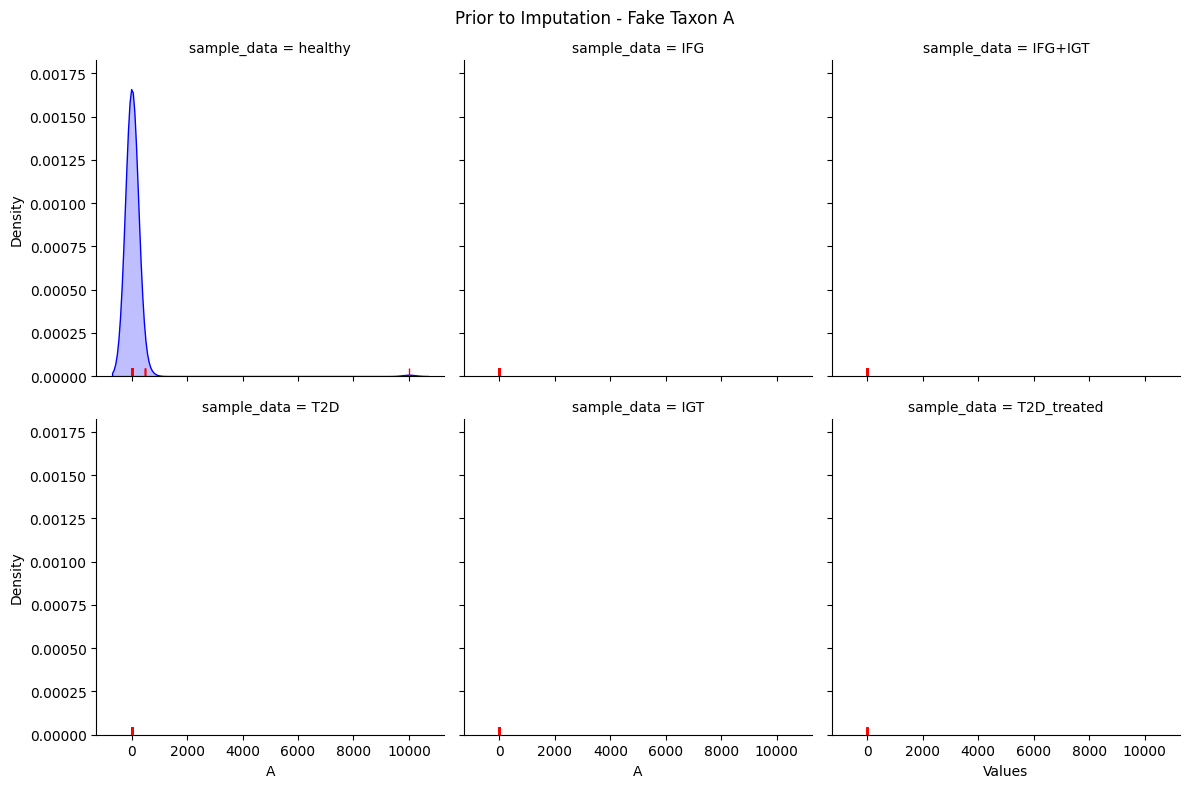

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that complement_asvstable is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': complement_asvstable['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Prior to Imputation - Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [19]:
#for imputation
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)
imputed_ALL_knn_17 = mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=5000,metric='euclidean',knn=17,return_type='imputed')

UMAP(angular_rp_forest=True, metric='cosine', n_components=10, n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Mon Jul 10 18:25:05 2023 Construct fuzzy simplicial set
Mon Jul 10 18:25:06 2023 Finding Nearest Neighbors
Mon Jul 10 18:25:13 2023 Finished Nearest Neighbor Search
Mon Jul 10 18:25:21 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jul 10 18:25:28 2023 Finished embedding
calculating distances
 afinity matrix done
imputation
done
done Mon Jul 10 18:25:28 2023


<ipython-input-14-527dd838f132>:61: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * (pdx_scale ** decay))


In [20]:
imputed_ALL_knn_3 = mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=5000,metric='euclidean',knn=3,return_type='imputed')

calculating distances
 afinity matrix done
imputation
done
done Mon Jul 10 18:25:28 2023


<ipython-input-14-527dd838f132>:61: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * (pdx_scale ** decay))


In [21]:
#for  visualization
umap_op = umap.UMAP(n_components=2, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Mon Jul 10 18:25:28 2023 Construct fuzzy simplicial set
Mon Jul 10 18:25:29 2023 Finding Nearest Neighbors
Mon Jul 10 18:25:29 2023 Finished Nearest Neighbor Search
Mon Jul 10 18:25:30 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jul 10 18:25:36 2023 Finished embedding


<ipython-input-22-b80592ba8a30>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10', s=70, alpha=0.7)


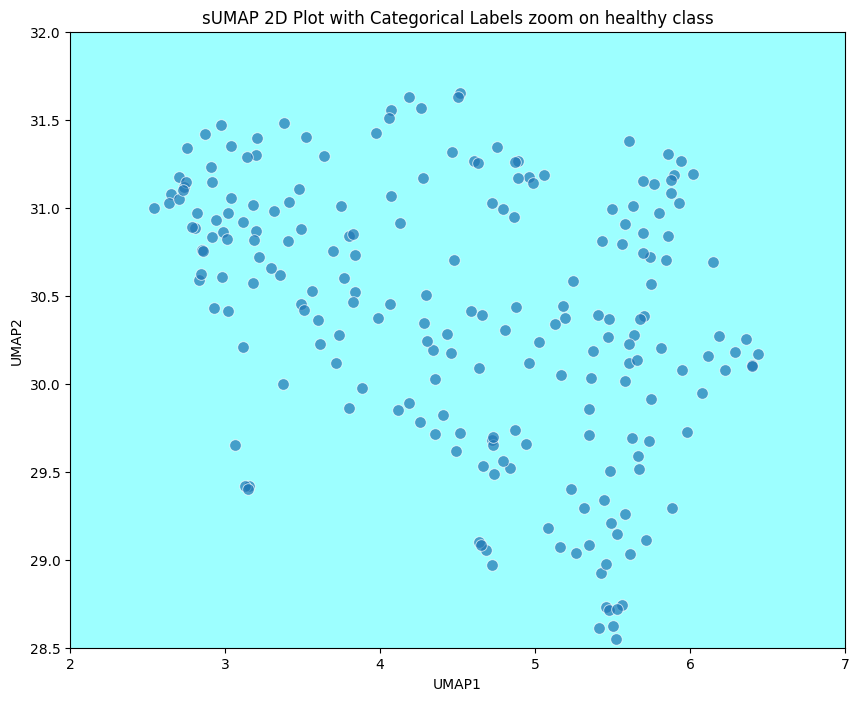

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the PCA data and label codes
umap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes': sample_data})

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the PCA data and label codes
umap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes': sample_data})

# Create a scatter plot with categorical labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10', s=70, alpha=0.7)

# Customize the plot
plt.title('sUMAP 2D Plot with Categorical Labels zoom on healthy class')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()


<ipython-input-23-5ff6860f70aa>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10', s=70, alpha=0.7)


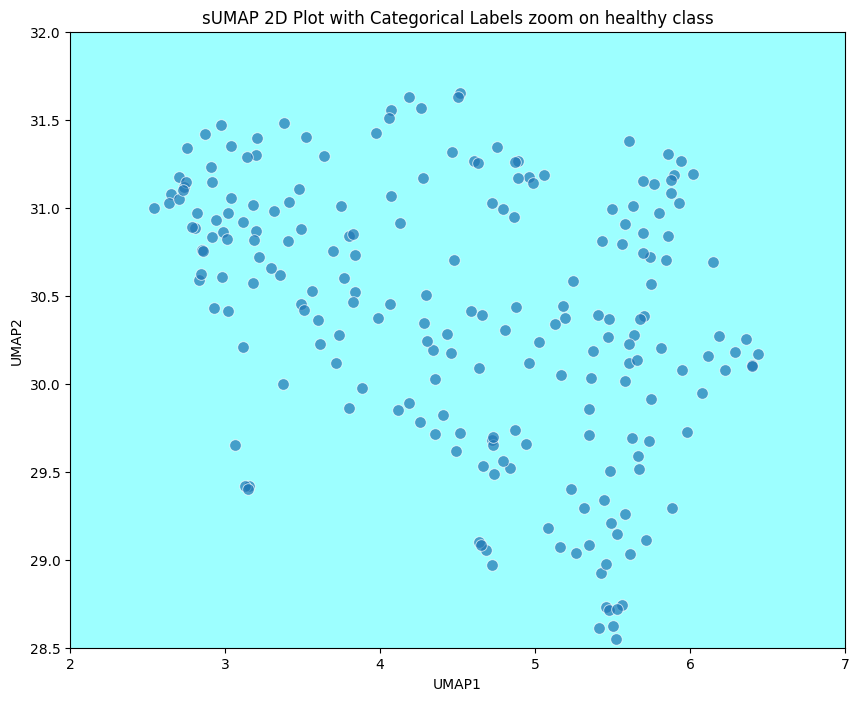

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the PCA data and label codes
umap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes': sample_data})

# Create a scatter plot with categorical labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10', s=70, alpha=0.7)

# Customize the plot
plt.title('sUMAP 2D Plot with Categorical Labels zoom on healthy class')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()



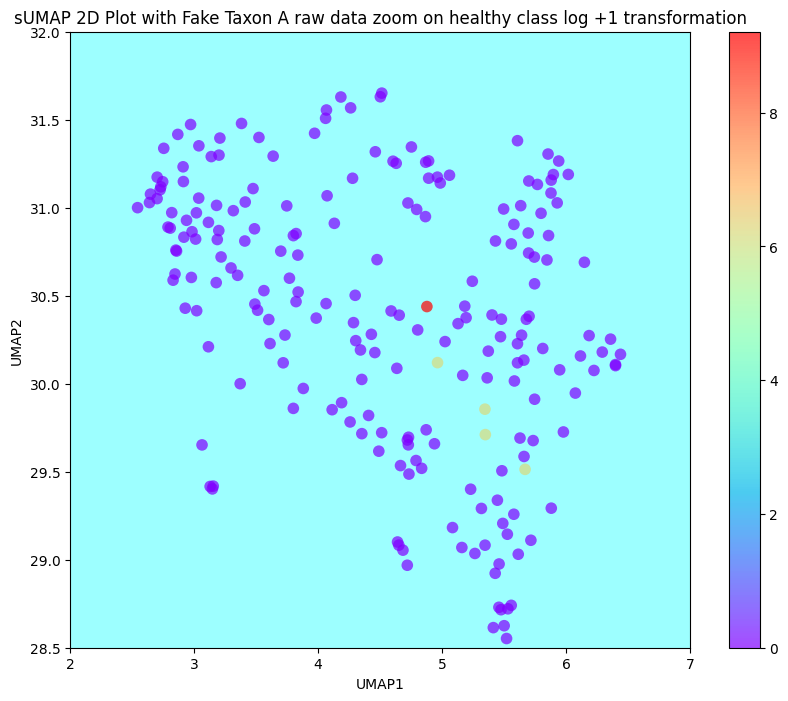

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=np.log(complement_asvstable['A'] +1), cmap='rainbow', edgecolor='none', s=70, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A raw data zoom on healthy class log +1 transformation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()


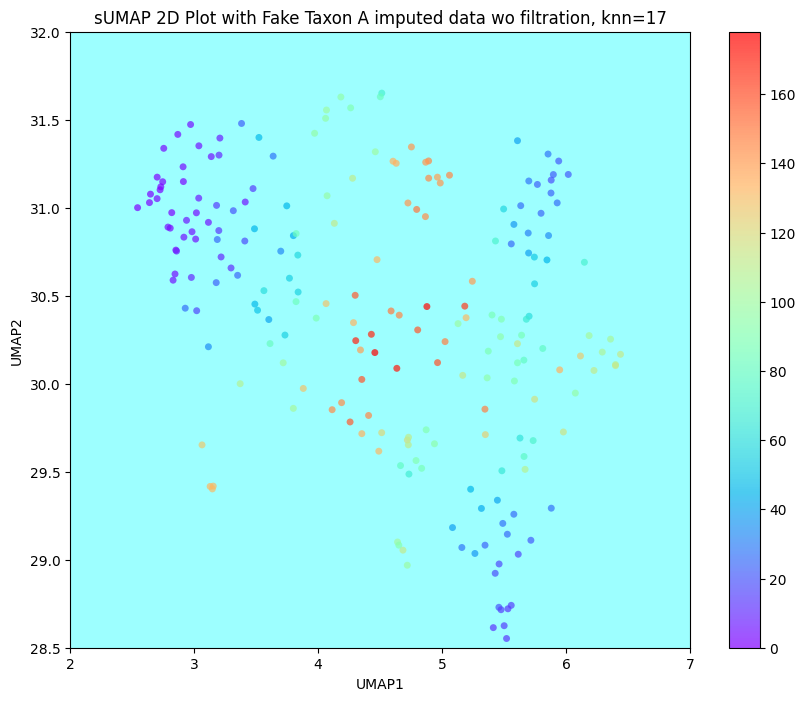

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=imputed_ALL_knn_17['A'], cmap='rainbow', edgecolor='none', s=25, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A imputed data wo filtration, knn=17')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()


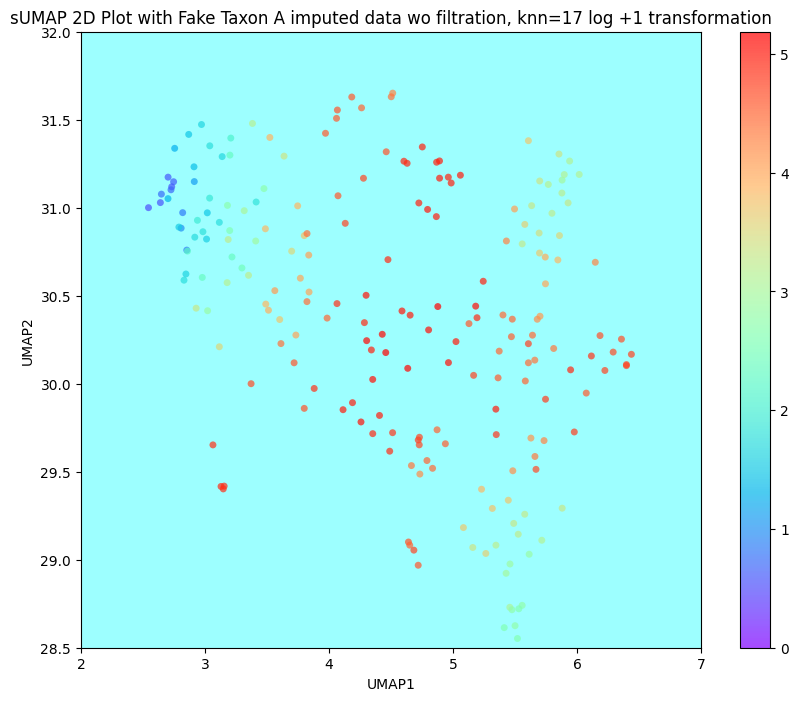

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=np.log(imputed_ALL_knn_17['A'] +1), cmap='rainbow', edgecolor='none', s=25, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A imputed data wo filtration, knn=17 log +1 transformation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()


In [39]:
import numpy as np
x = 5  # Valor para calcular el logaritmo inverso
log_inverse = np.exp(500)
log_inverse

1.4035922178528375e+217

In [42]:
np.log(10000)

9.210340371976184

In [41]:
np.log(500)

6.214608098422191

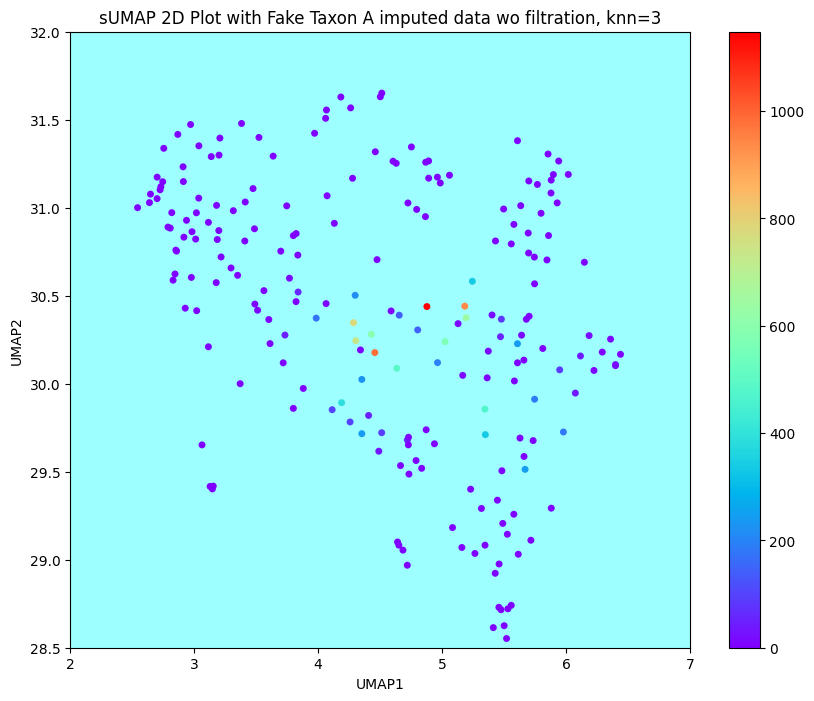

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=imputed_ALL_knn_3['A'], cmap='rainbow', edgecolor='none', s=25, alpha=1)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A imputed data wo filtration, knn=3')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()


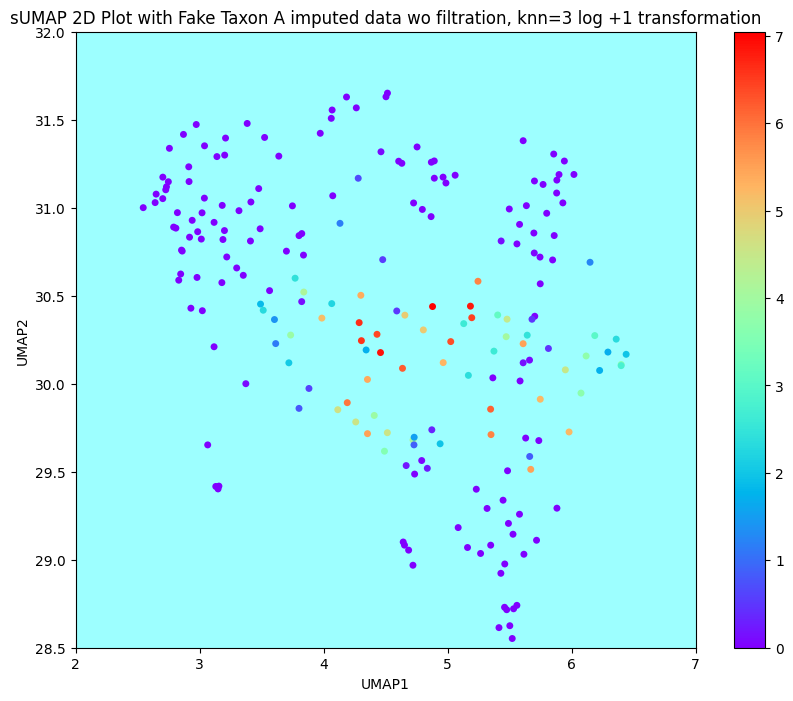

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=np.log(imputed_ALL_knn_3['A'] +1), cmap='rainbow', edgecolor='none', s=25, alpha=1)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A imputed data wo filtration, knn=3 log +1 transformation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue
plt.xlim(2, 7)  # Replace x_min and x_max with the desired range for the x-axis
plt.ylim(28.5, 32)  # Replace y_min and y_max with the desired range for the y-axis

# Show the plot
plt.show()

In [36]:
import numpy as np
x = 5  # Valor para calcular el logaritmo inverso
log_inverse = np.exp(1)
log_inverse

2.718281828459045

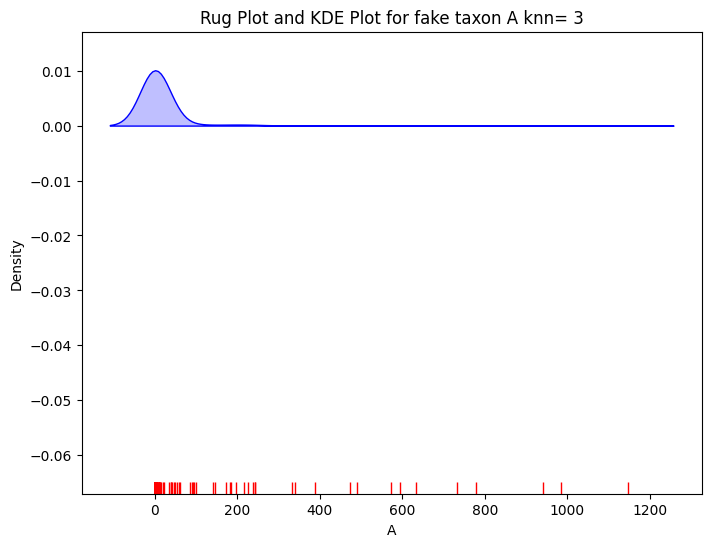

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL_knn_3['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a rug plot for column 'A'
sns.rugplot(data=df, x='A', ax=ax, color='r')

# Create a KDE plot for column 'A'
sns.kdeplot(data=df, x='A', ax=ax, color='b', fill=True)

# Set the plot title and labels
ax.set_title('Rug Plot and KDE Plot for fake taxon A knn= 3')
ax.set_xlabel('A')

# Show the plot
plt.show()


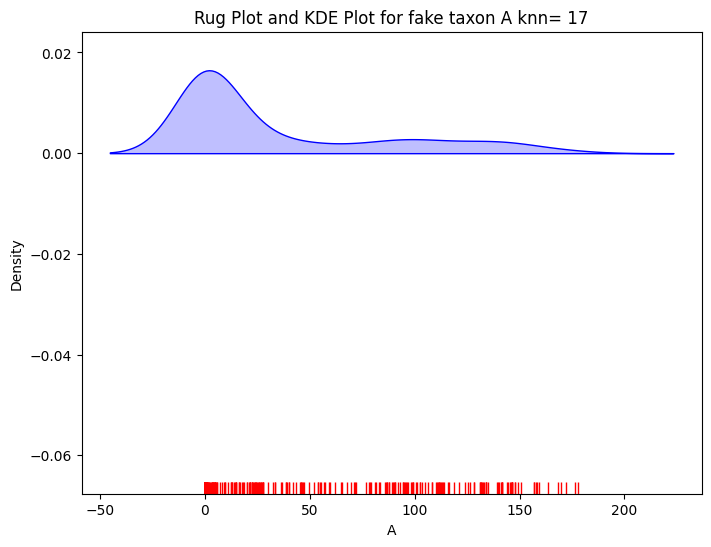

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL_knn_17['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a rug plot for column 'A'
sns.rugplot(data=df, x='A', ax=ax, color='r')

# Create a KDE plot for column 'A'
sns.kdeplot(data=df, x='A', ax=ax, color='b', fill=True)

# Set the plot title and labels
ax.set_title('Rug Plot and KDE Plot for fake taxon A knn= 17')
ax.set_xlabel('A')

# Show the plot
plt.show()
